# 국내 COVID-19 3차 백신접종 시계열 분석

In [1]:
from dateutil.parser import parse
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.tsa.api as tsa
import itertools

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
vc = pd.read_excel("코로나바이러스감염증-19_백신별_일일_접종현황_20211209(0시 기준).xls", skiprows = [0, 1, 2, 3, 4, 5])
vc

,Unnamed: 0,1차,2차,3차(부스터),1차.1,2차\n(AZ-PF교차포함),1차.2,2차\n(교차미포함),1차.3,1차.4,2차\n(M-Pf 교차 포함),Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2021-12-08,42822222,41509745,4843497,11121386,11040155,23481036,22504204,1501734,6718066,6463652,3670305,1155867,17325
1,2021-02-26,28879,5411,0,21647,885,2272,1232,20,4940,3274,0,0,0
2,2021-02-27,30437,5493,0,22768,890,2667,1257,22,4980,3324,0,0,0
3,2021-02-28,31363,5545,0,23352,890,2993,1288,22,4996,3345,0,0,0
4,2021-03-01,33047,5624,0,24568,914,3365,1314,25,5089,3371,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2021-12-04,42683867,41347366,3958074,11121379,11037699,23356762,22373612,1500872,6704854,6435183,3030810,911356,15908
283,2021-12-05,42685616,41349371,3961784,11121379,11037714,23358261,22375251,1500904,6705072,6435502,3033226,912520,16038
284,2021-12-06,42738395,41415876,4250596,11121386,11038445,23405509,22430102,1501168,6710332,6446161,3246051,988238,16307
285,2021-12-07,42776731,41458373,4544343,11121386,11039283,23439592,22462230,1501411,6714342,6455449,3461908,1065751,16684


In [3]:
vc1 = vc.drop(columns=['1차.1', '2차\n(AZ-PF교차포함)', '1차.2',
       '2차\n(교차미포함)', '1차.3', '1차.4', '2차\n(M-Pf 교차 포함)', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'])
vc1

,Unnamed: 0,1차,2차,3차(부스터)
0,2021-12-08,42822222,41509745,4843497
1,2021-02-26,28879,5411,0
2,2021-02-27,30437,5493,0
3,2021-02-28,31363,5545,0
4,2021-03-01,33047,5624,0
...,...,...,...,...
282,2021-12-04,42683867,41347366,3958074
283,2021-12-05,42685616,41349371,3961784
284,2021-12-06,42738395,41415876,4250596
285,2021-12-07,42776731,41458373,4544343


In [4]:
vc2 = vc1.drop(index=0)
vc2

,Unnamed: 0,1차,2차,3차(부스터)
1,2021-02-26,28879,5411,0
2,2021-02-27,30437,5493,0
3,2021-02-28,31363,5545,0
4,2021-03-01,33047,5624,0
5,2021-03-02,99690,5743,0
...,...,...,...,...
282,2021-12-04,42683867,41347366,3958074
283,2021-12-05,42685616,41349371,3961784
284,2021-12-06,42738395,41415876,4250596
285,2021-12-07,42776731,41458373,4544343


In [5]:
vc2.columns = ['일자', '1차', '접종완료', '부스터']
vc2

,일자,1차,접종완료,부스터
1,2021-02-26,28879,5411,0
2,2021-02-27,30437,5493,0
3,2021-02-28,31363,5545,0
4,2021-03-01,33047,5624,0
5,2021-03-02,99690,5743,0
...,...,...,...,...
282,2021-12-04,42683867,41347366,3958074
283,2021-12-05,42685616,41349371,3961784
284,2021-12-06,42738395,41415876,4250596
285,2021-12-07,42776731,41458373,4544343


In [8]:
vc2_time = pd.pivot_table(data = vc2, index = '일자', values = '부스터', aggfunc = 'sum')
vc2_time.head()

,부스터
일자,
2021-02-26,0
2021-02-27,0
2021-02-28,0
2021-03-01,0
2021-03-02,0


In [9]:
y = vc2_time['부스터'].resample('1D').mean()

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.show()

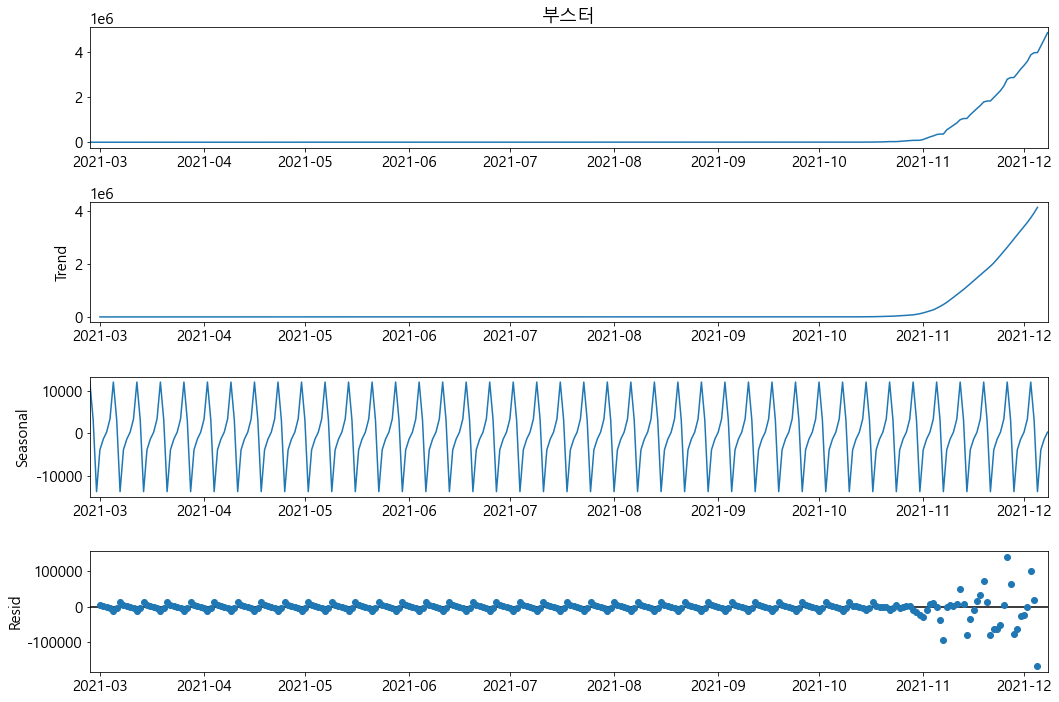

In [11]:
ms = tsa.seasonal_decompose(y, model='additive')
fig = ms.plot()

In [12]:
p = d = q =range (0, 2)
pdq = list(itertools.product(p, d, q))
season_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [13]:
season_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [14]:
p_list = []
p_season_list = []
results_AIC_list = []

In [15]:
for param in pdq:
    for p_season in season_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order = param,
                                        seasonal_order = p_season,
                                        enforce_stationarity = False,
                                        enforce_inveribility = False)
            results = mod.fit()
            p_list.append(param)
            p_season_list.append(p_season)
            results_AIC_list.append(results.aic)
        except:
            continue

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: C

In [16]:
ARIMA_list = pd.DataFrame({'Parameter':p_list,'Seasonal':p_season_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [17]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
47,"(1, 0, 1)","(1, 1, 1, 12)",6115.255780
43,"(1, 0, 1)","(0, 1, 1, 12)",6121.572380
35,"(1, 0, 0)","(0, 1, 1, 12)",6144.624356
63,"(1, 1, 1)","(1, 1, 1, 12)",6154.523244
55,"(1, 1, 0)","(1, 1, 1, 12)",6158.166794
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",7986.640596
12,"(0, 0, 1)","(1, 0, 0, 12)",8016.145894
1,"(0, 0, 0)","(0, 0, 1, 12)",8119.863842
8,"(0, 0, 1)","(0, 0, 0, 12)",8377.758847


In [18]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                부스터   No. Observations:                  286
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3072.262
Date:                            Sun, 12 Dec 2021   AIC                           6154.523
Time:                                    20:50:36   BIC                           6172.307
Sample:                                02-26-2021   HQIC                          6161.674
                                     - 12-08-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3081      0.041     -7.435      0.000      -0.389      -0.227
ma.L1          0.9637      0.011   

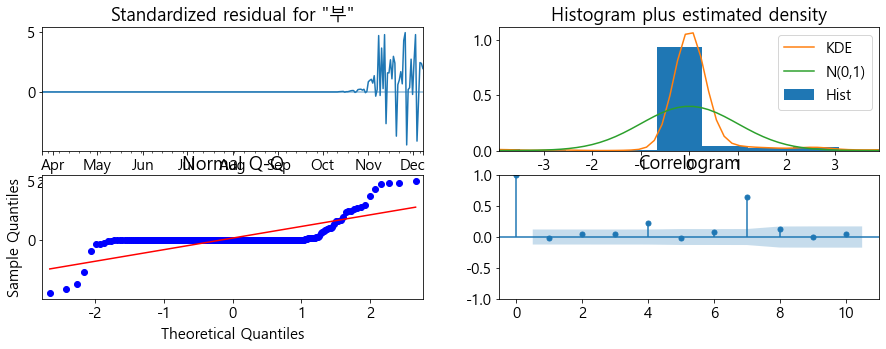

In [19]:
results.plot_diagnostics(figsize=(15, 5));

In [20]:
results.get_prediction();

In [21]:
y.head()

일자
2021-02-26    0
2021-02-27    0
2021-02-28    0
2021-03-01    0
2021-03-02    0
Freq: D, Name: 부스터, dtype: int64

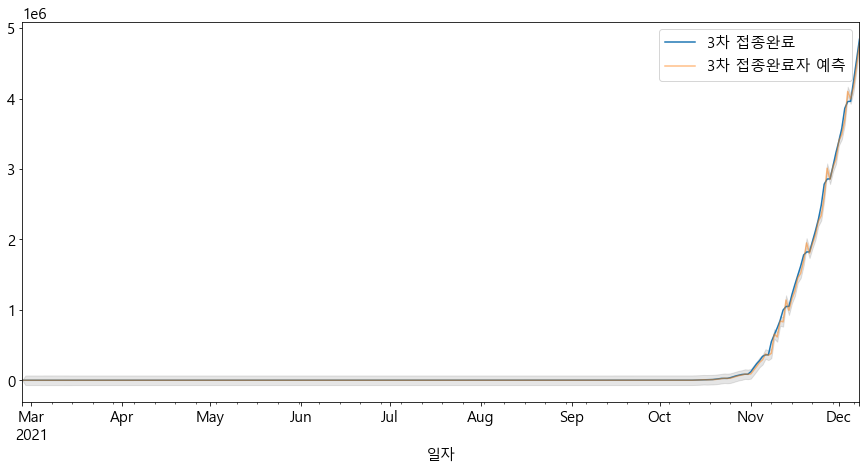

In [22]:
prediction = results.get_prediction(start=pd.to_datetime('2021-02-26'), dynamic=False)
prediction_c = prediction.conf_int()

ax = y.plot(label='3차 접종완료')
prediction.predicted_mean.plot(ax=ax, label='3차 접종완료자 예측', alpha=.5, figsize=(15, 7))
ax.fill_between(prediction_c.index,prediction_c.iloc[:, 0],prediction_c.iloc[:, 1], color='k', alpha=.1)

plt.legend();

In [23]:
prediction = results.get_prediction(start=pd.to_datetime('2021-02-26'), dynamic=False)
pd.DataFrame(prediction.predicted_mean).reset_index();

In [24]:
y_forecast = prediction.predicted_mean
y_truth = y['2021-02-26':]
mse = ((y_forecast - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 1065084013.59


In [25]:
prediction_u = results.get_forecast(steps=100)

In [26]:
prediction_u.predicted_mean

2021-12-09    4.991584e+06
2021-12-10    5.038709e+06
2021-12-11    5.217158e+06
2021-12-12    5.411029e+06
2021-12-13    5.607476e+06
                  ...     
2022-03-14    2.144977e+07
2022-03-15    2.159844e+07
2022-03-16    2.164614e+07
2022-03-17    2.182453e+07
2022-03-18    2.201844e+07
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

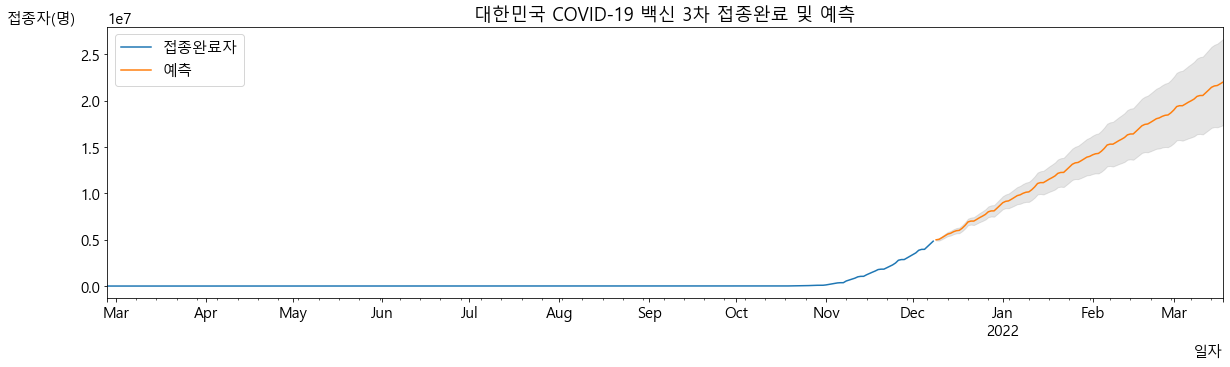

In [28]:
prediction_u = results.get_forecast(steps=100)
prediction_c = prediction_u.conf_int()
ax = y.plot(label='접종완료자', figsize=(20, 5))
prediction_u.predicted_mean.plot(ax=ax, label='예측')
ax.fill_between(prediction_c.index,
                 prediction_c.iloc[:, 0],
                 prediction_c.iloc[:, 1], color='grey', alpha=.2)

plt.title('대한민국 COVID-19 백신 3차 접종완료 및 예측')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.ylabel('접종자(명)', rotation=0, loc='top');

plt.savefig('국내 3차접종 및 예측.png', dpi=100);